## Utkarsha Vidhale
# Sales of Child Car Seats Analysis
Dataset : https://r-data.pmagunia.com/dataset/r-dataset-package-islr-carseats

This dataset is a part of ISLR package. I tried to perform some analysis in Python instead of R .



### Libraries used:

In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from heatmap import heatmap, corrplot
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Loading the dataset

In [9]:
df = pd.read_csv('Carseats.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [10]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [45]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

We will be trying to predict the sales of carseats. In this data set, a single observation represents a location where carseats are sold.

Sales - Unit sales (in thousands) at each location

CompPrice - Price charged by competitor at each location

Income - Community income level (in thousands of dollars)

Advertising - Local advertising budget for company at each location (in thousands of dollars)

Population - Population size in region (in thousands)

Price - Price company charges for car seats at each site

ShelveLoc - A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

Age - Average age of the local population

Education - Education level at each location

Urban - A factor with levels No and Yes to indicate whether the store is in an urban or rural location

US - A factor with levels No and Yes to indicate whether the store is in the US or not

### Correlating the quantitative variabls :

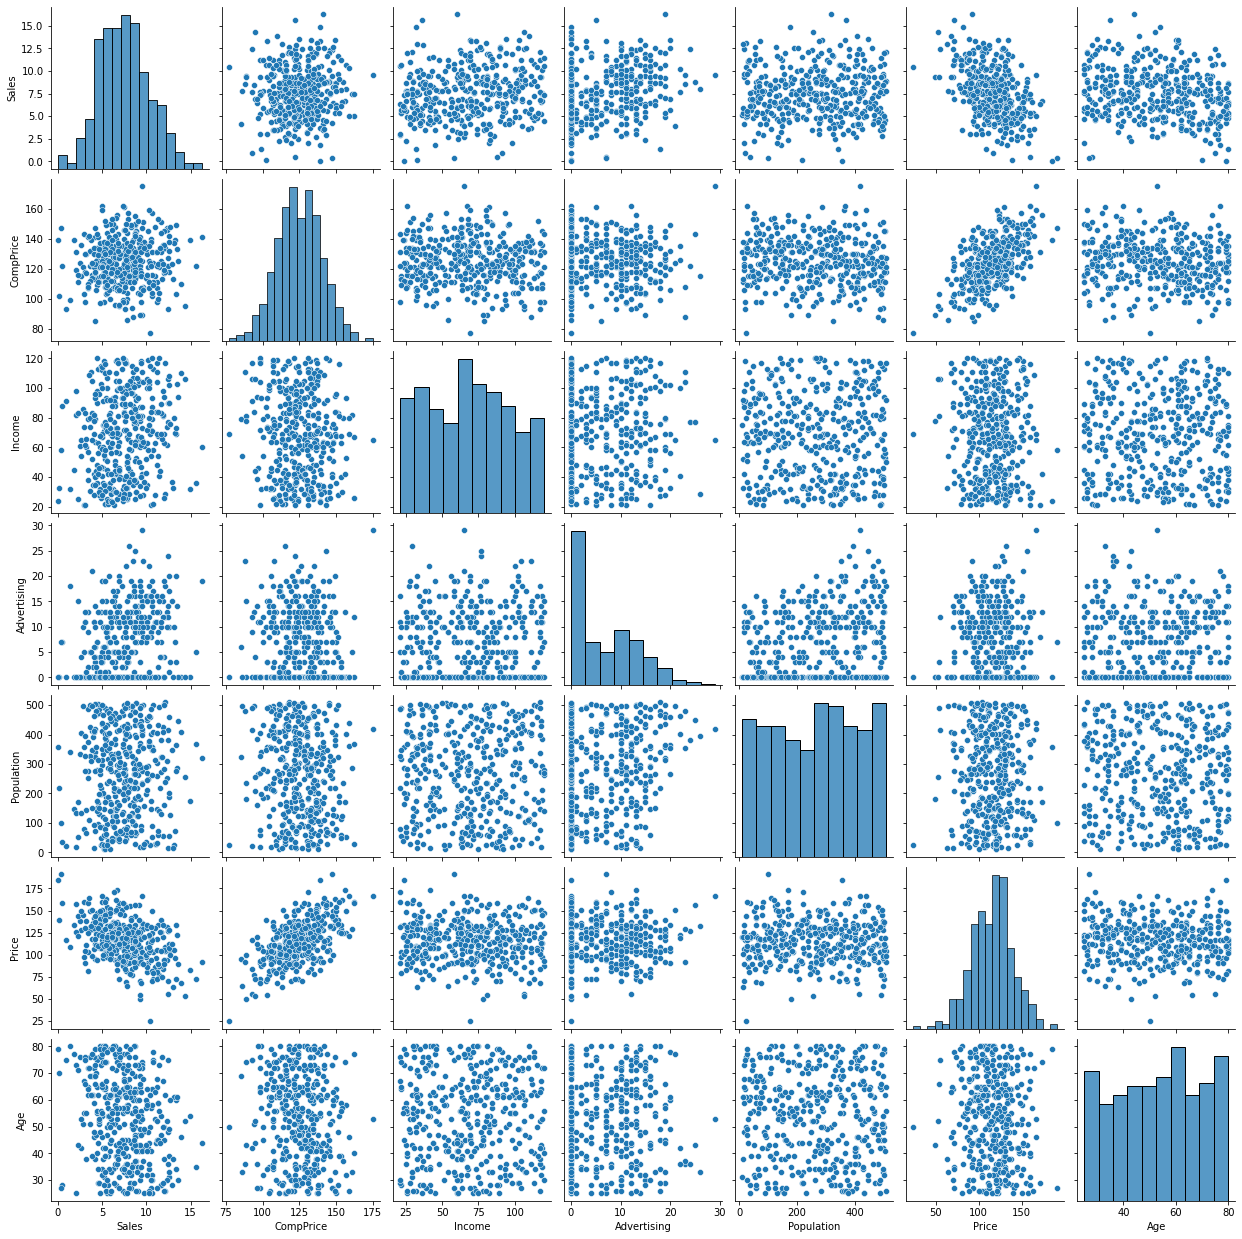

In [11]:
df_1=df[["Sales","CompPrice","Income","Advertising","Population","Price","Age"]]
sns.pairplot(df_1)



Some linear relationship between: 'Sales' and 'Price' as well as between 'ComPprice' and 'Sales'

### Boxplots
#### Sales and ShelveLoc

<AxesSubplot:xlabel='ShelveLoc', ylabel='Sales'>

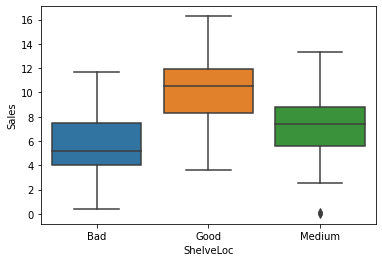

In [18]:
sns.boxplot(x='ShelveLoc' ,y='Sales' ,data=df)

#### Sales and Urban

<AxesSubplot:xlabel='Urban', ylabel='Sales'>

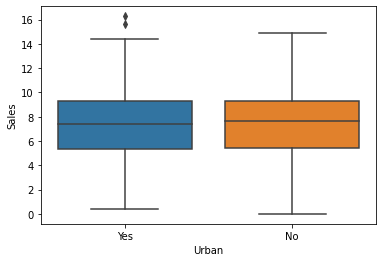

In [19]:
sns.boxplot(y='Sales' ,x='Urban' ,data=df)

#### Sales and US

<AxesSubplot:xlabel='US', ylabel='Sales'>

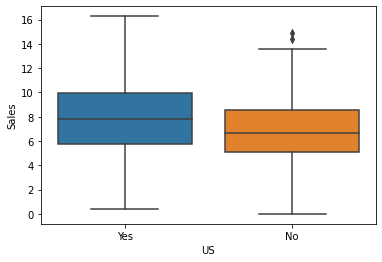

In [20]:
sns.boxplot(x='US' ,y='Sales' ,data=df)

### Splitting the dataset in tarining and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
rs=42
predict="Sales"
X=np.array(data.drop([predict],1))
y=np.array(data[predict])
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=rs)
#20% training and 80% testing

## Predicting sales based on 'US' and 'Urban'

In [37]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [41]:
# Make predictions using the testing set
sales_y_pred = regr.predict(X_test)

In [45]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, sales_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, sales_y_pred))

# Plot outputs
#plt.scatter(X_test, y_test,  color='black')
#plt.plot(X_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

Coefficients: 
 [-0.09097651  2.32920384  0.08539496]
Mean squared error: 2.30
Coefficient of determination: 0.77


In [21]:
data=df.loc[:,['Sales','Price','ShelveLoc','CompPrice']]
feature_Names = ['Sales','Price','ShelveLoc','CompPrice']

shelveLocDict = {"ShelveLoc": {"Bad": 0, "Medium": 1,"Good":2}}
data.replace(shelveLocDict, inplace=True)

In [22]:
from sklearn.model_selection import train_test_split
rs=42
predict="Sales"
X=np.array(data.drop([predict],1))
y=np.array(data[predict])
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=rs)

In [23]:
from sklearn.tree import DecisionTreeRegressor 
tree_regressor = DecisionTreeRegressor(random_state = rs)


In [24]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
text_representation = tree.export_text(tree_regressor)
print(text_representation)

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_regressor, 
                   feature_names= feature_Names,
                   class_names=
                   filled=True)


#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(clf, 
#                   feature_names=iris.feature_names,  
#                   class_names=iris.target_names,
#                   filled=True)

dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)


    #feature names = column names
    #identify class names
    # plot the plot
    # really need text presentation??